# PRACTICA 5

* Julián Mauricio Sánchez Ceballos
* 1001132830

Departamento de Ingeniería de Electrónica y de Telecomunicaciones

In [1]:
# Setup de la practica se agrega el -q para que no imprima el log de la instalacion


%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q
%pip install control -q

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal

import control as ctrl
import warnings 
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Transformada Z

De acuerdo al último digito de la cedula el sistema representado en ecuaciones en diferencias es:

$$ y[n] = x[n] + 8x[n - 1] - 2y[n - 2] + 5y[n - 1] $$

$$ Y(z) = X(z) + 8z^{-1} X(z) -2z^{-2}Y(z) + 5z^{-1}Y(z) $$

Agrupando los términos:

$$ Y(z) + 2z^{-2}Y(z) - 5z^{-1}Y(z) = X(z) + 8z^{-1} X(z)$$

$$ Y(z) (1 + 2z^{-2} - 5z^{-1} )= X(z) (1 + 8z^{-1})$$

Finalmente la función de transferencia:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1 + 8z^{-1}}{1 - 5z^{-1} + 2z^{-2}}$$


Para convertir los exponentes en positivos se multiplica por $\frac{z²}{z²}$ obtieniendo:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{z^{2} + 8z}{z² - 5z + 2}$$

Funcion de transferencia
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  s^2 + 8 s
-------------
s^2 - 5 s + 2



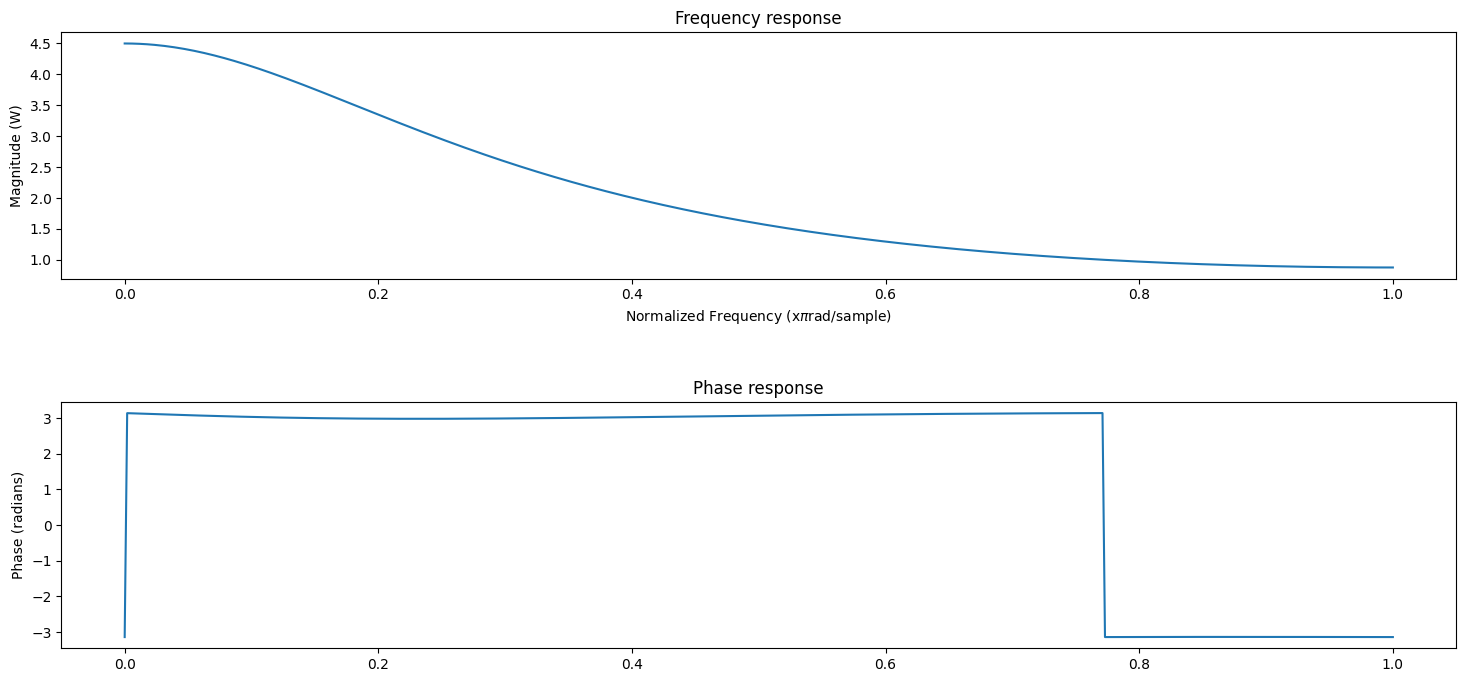

In [2]:
from ztrans import *

num = [1, 8, 0]
den = [1, -5, 2]

# imprimir la funcion de transfer
print("Funcion de transferencia")
H = ctrl.tf(num, den)
print(H)



mfreqz(num, den)


El sistema amplifica las frecuencias bajass y atenua las frecuencias altas, lo que coincide con el comportamiento de un filtro pasabajas. Respecto al comportamiento de la respuesta en fase, hay cierta tendencia muy pequeña a disminuir lo que podría indicar un retardo, comportamiento tipico en filtros digitales

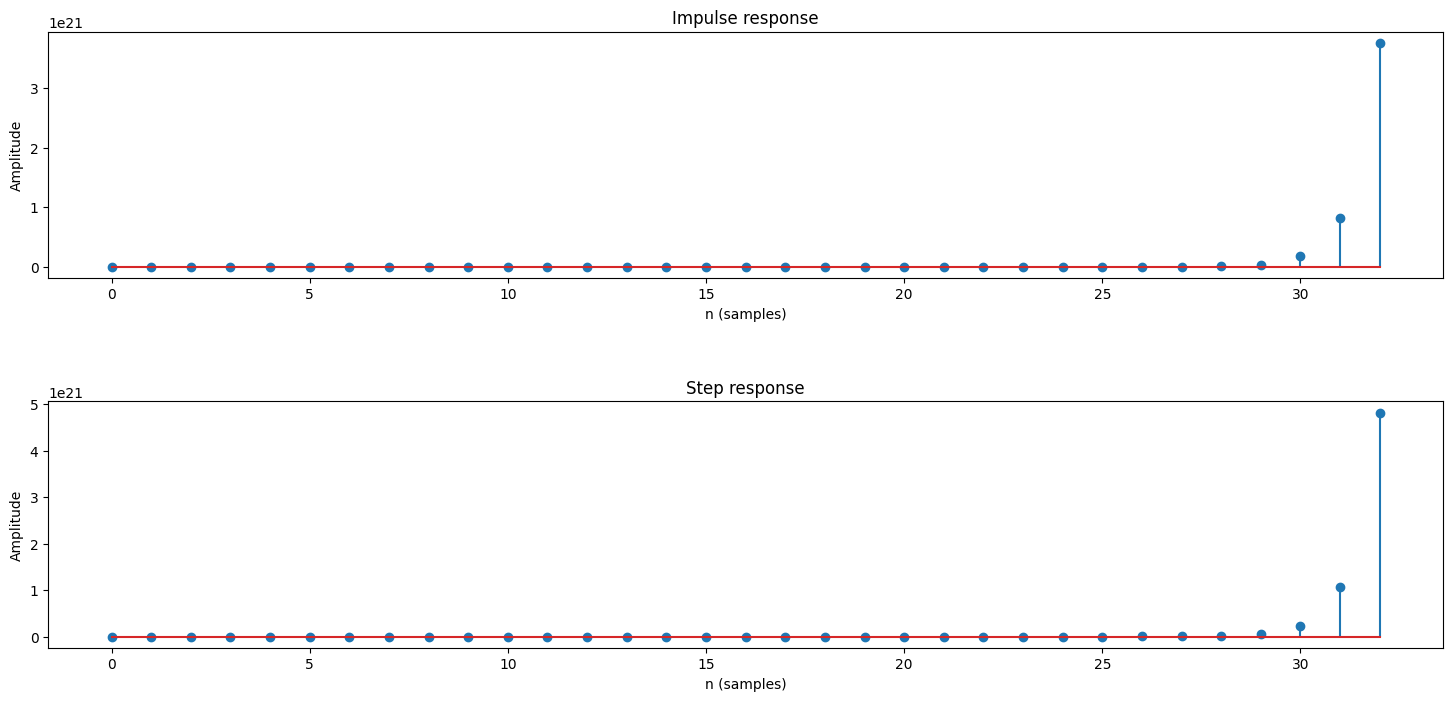

In [3]:
impz(num, den)

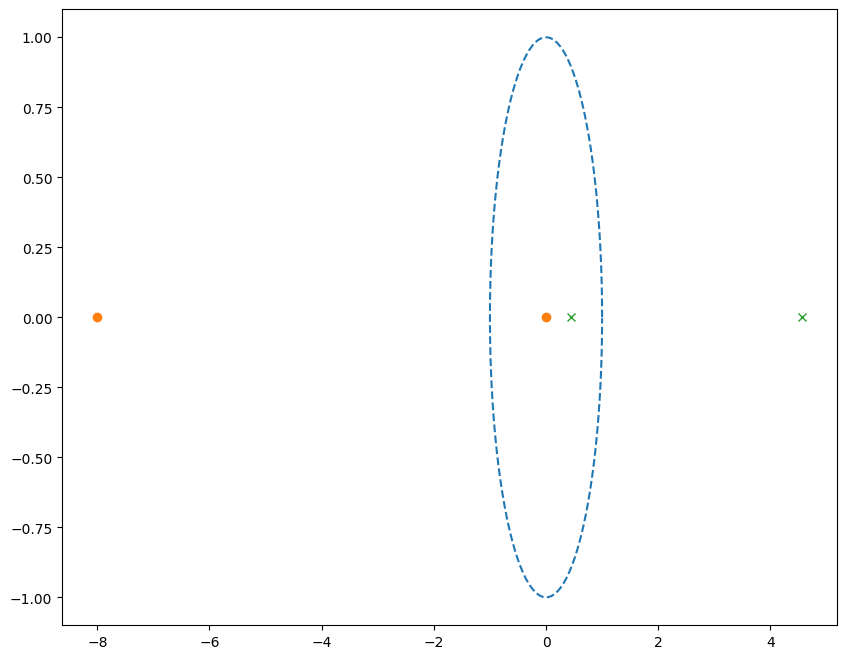

In [4]:
zeropoles(num, den)

Como era de esperarse, por la respuesta al escalon y al impulso y dado que ambas respuestas crecen de forma explosiva y momentanea despues de unos cuantos pasos, el sistema presenta un comportamiento inestable. 

Al observar los polos, se encuentra un polo por fuera del circuilo unitario $z \approx 4.5615$, lo que indica que el sistema es inestable.


## 2. Transformada Z: Introducción a los filtros digitales
    
1. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe tener una duración de 40 segundos y una frecuencia de muestreo de 5000 Hz.
    
2. Grafique y escuche la señal ¿Qué se puede decir acerca del audio?
    
3. Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes   instrucciones:


```python
    import scipy.signal as signal
    n = 9
    num = signal.firwin(n, [0.2, 0.4], pass zero=False)
    den=np.zeros(n)
    den[0] = 1
```

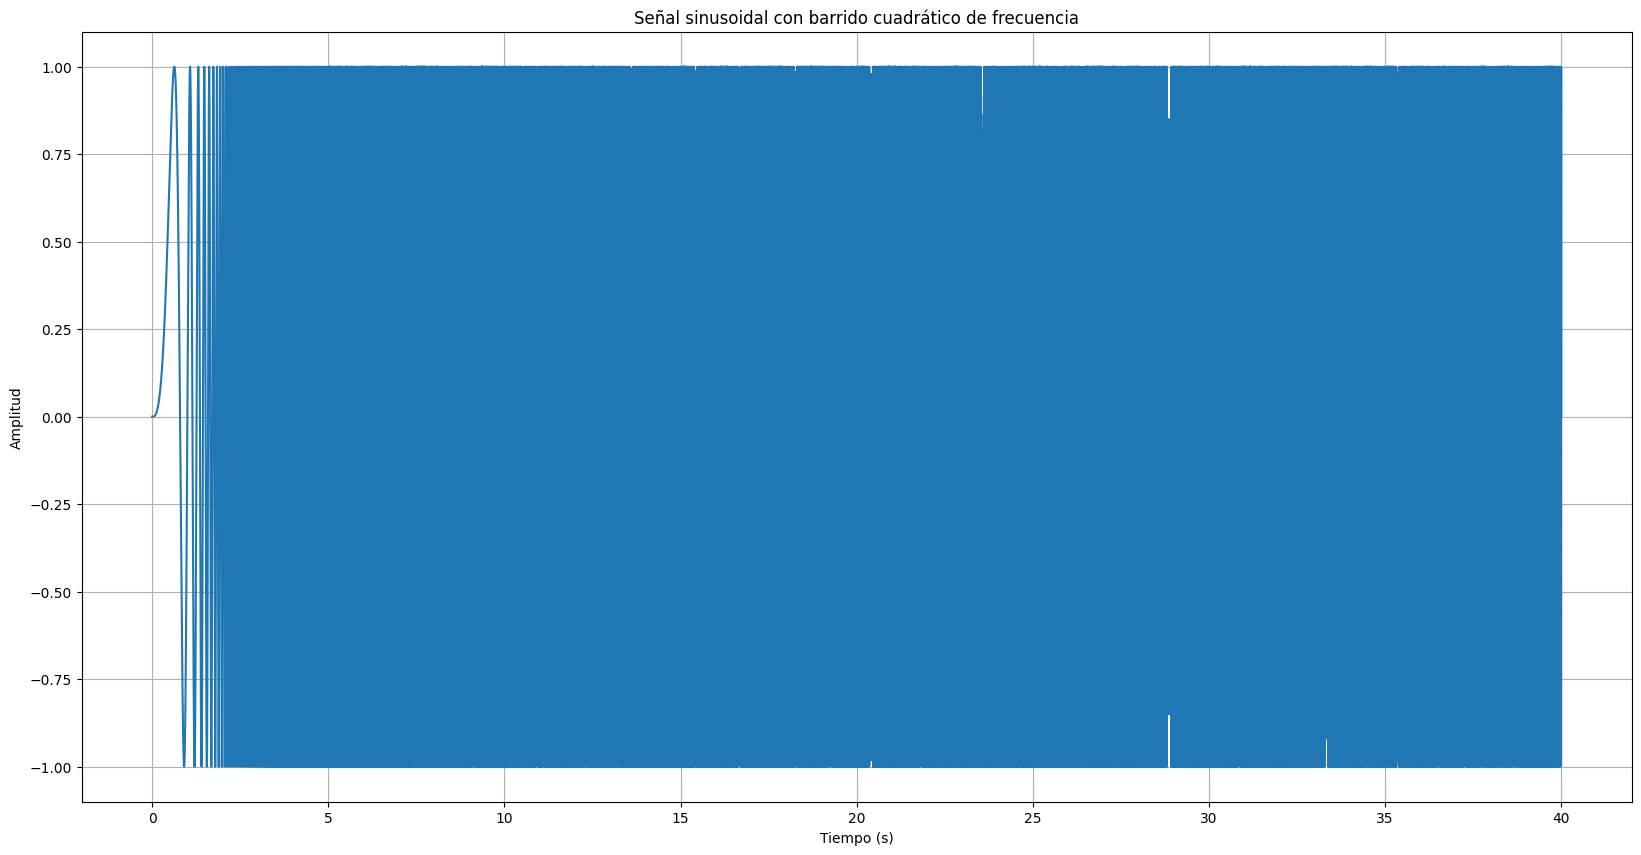

NameError: name 'fs' is not defined

In [5]:

# Parámetros
duración = 40  # Duración en segundos
frec_muestreo = 5000  # Frecuencia de muestreo en Hz
frec_inicial = 10  # Frecuencia inicial en Hz

# Crear de tiempo
t = np.linspace(0, duración, duración * frec_muestreo)
f_t = t**2
signal_quad = np.sin(2 * np.pi * f_t * t)


# Gráfica
plt.figure(figsize=(20, 10))
plt.plot(t, signal_quad)
plt.title("Señal sinusoidal con barrido cuadrático de frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

from IPython.display import Audio
Audio(signal_quad, rate=fs)



El sonido comienza a hacerse más agudo, cuando esto sucede la frecuencia de la señal es más alta y se acerca cada vez más al límite de Nyquist, cuando supera dicho límite aparece el fenómeno de aliasing. Lo anterior hace que el sonido que debería ser más alto empiece a "perder" frecuencia, esto se escucha como la señal reproduciéndose ahora de lo más agudo hasta lo más grave del inicio. 

4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de
polos y ceros del filtro FIR.
5. ¿Qué puede concluir acerca de las gráficas anteriores? ¿Qué tipo de filtro es? ¿Cuáles son las frecuencias de
corte? ¿Dónde están ubicados los polos y ceros? ¿Qué puede decir de la estabilidad del filtro?
6. Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y después de pasar
por el filtro. ¿Qué le ocurrió a la señal?

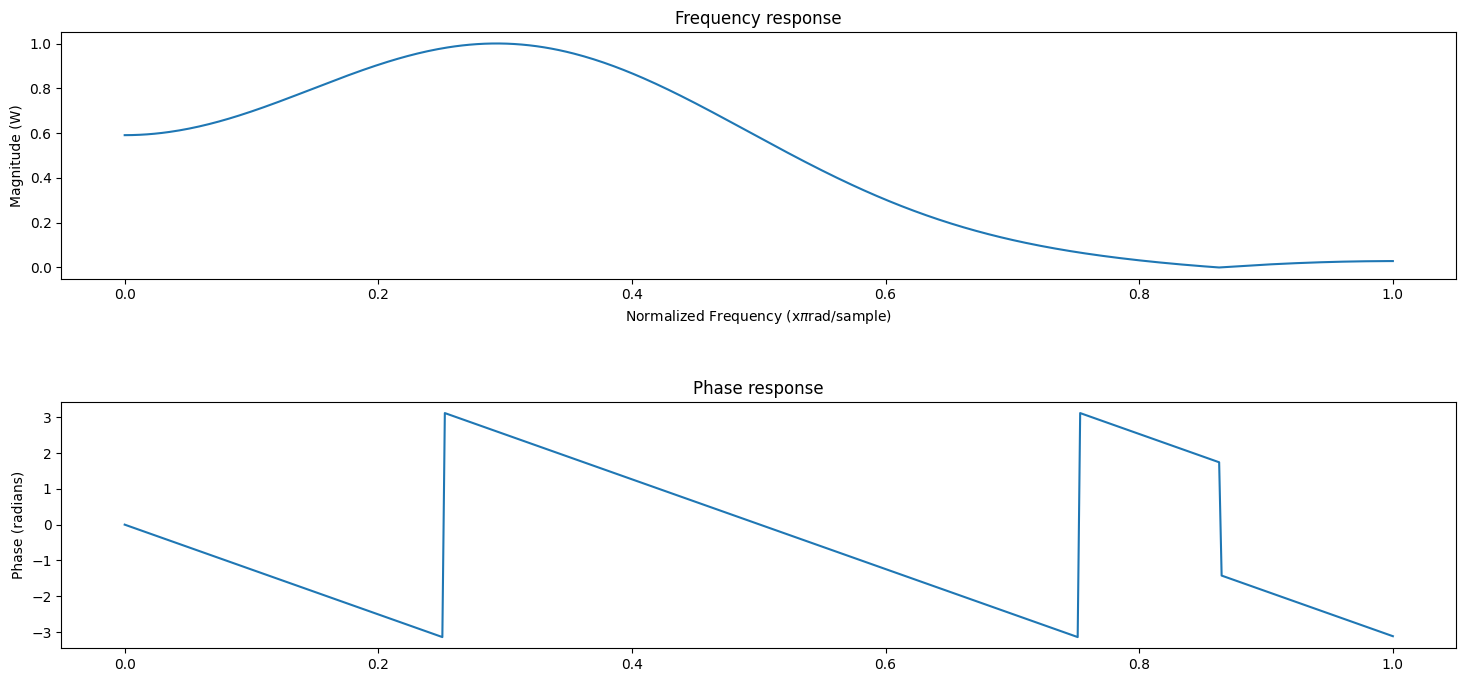

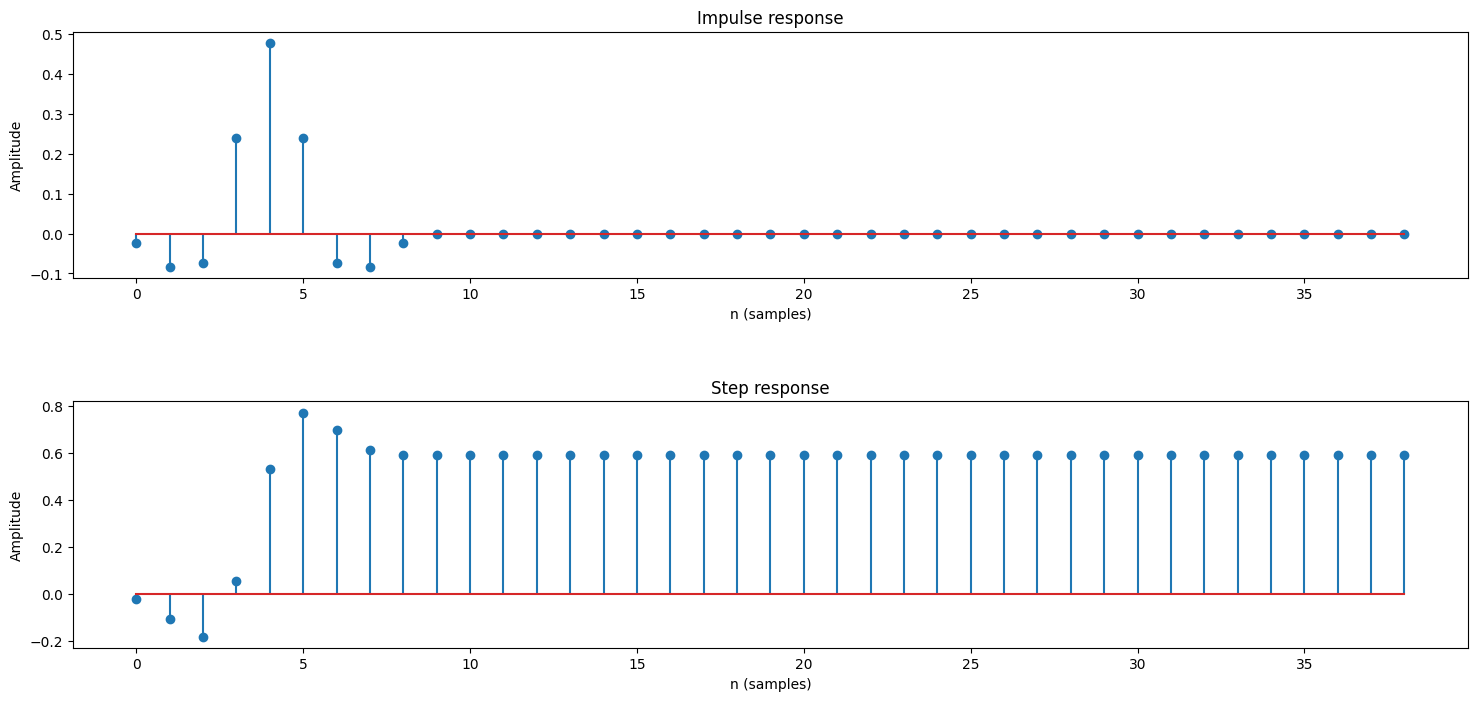

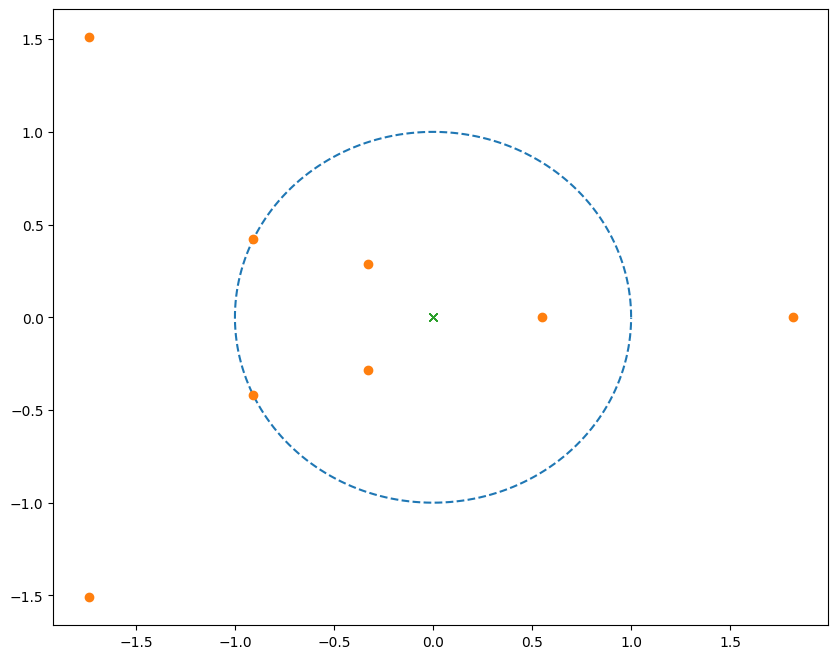

Funcion de transferencia


TransferFunction(array([-0.02335544, -0.08358557, -0.07443187,  0.23853184,  0.47680848,
        0.23853184, -0.07443187, -0.08358557, -0.02335544]), array([1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
n = 9 
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1


# Respuesta al impulso
mfreqz(num, den)

# Respuesta al impulso
impz(num, den)

# grafica de zeros y polos
zeropoles(num, den)

# Imprimir la función de transferencia del filtro FIR
print("Funcion de transferencia")
ctrl.tf(num, den)

La forma de la respuesta al en freciencia muestra un filtro pasabandas, el filtro solo tiene un polo y está en el origen haciendo que el sistema sea estable, la cantidad de ceros es $n-1$ siendo n el orden del filtro.

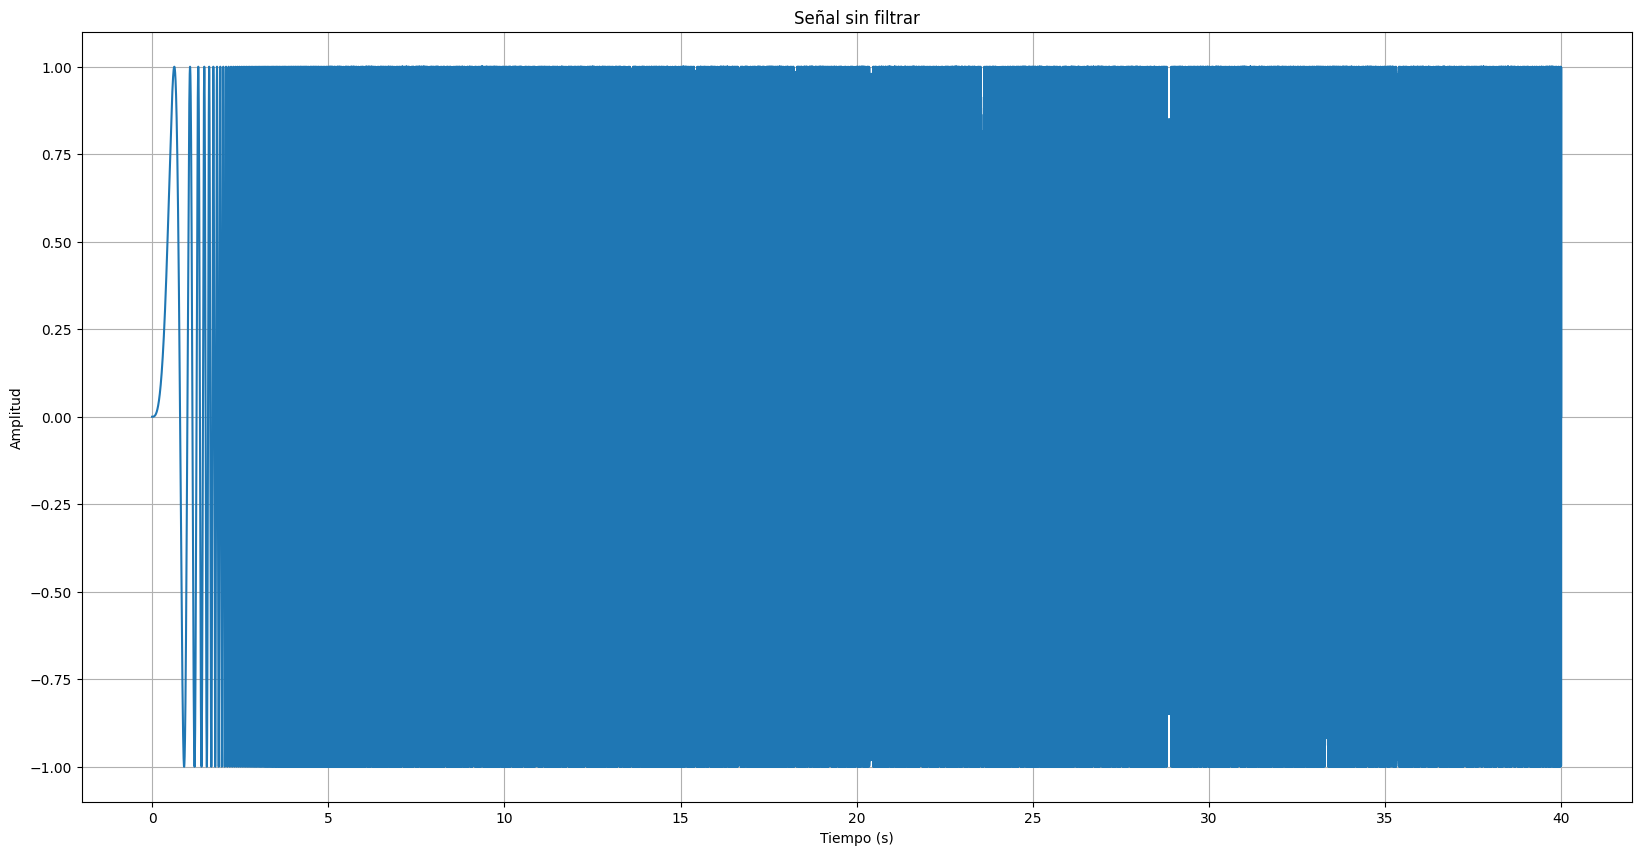

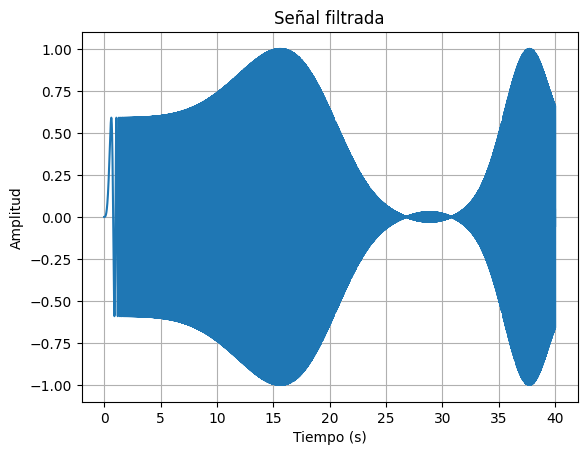

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(t, signal_quad)
plt.title("Señal sin filtrar")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Filtrar la señal
data2 = np.convolve(signal_quad, num, mode='same')
plt.plot(t, data2)
plt.title("Señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

La frecuencia de la señal es una función del tiempo así que la gráfica muestra el comportamiento del filtro basabandas: para tiempos iniciales (frecuencias bajas) la señal pasa de estar atenuada a acercarse al 1, luego, cuando el tiempo aumenta y la frecuencia también la señal se atenúa cada vez más hasta hacerse cero. Luego, como se viola el teorema de Nyquist vuelve a presentarse el mismo comportamiento pasabandas.

7. Aumente progresivamente el orden n del filtro (mı́nimo 3 veces), repita el procedimiento anterior (items 3, 4,
5, y 6), y concluya. Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

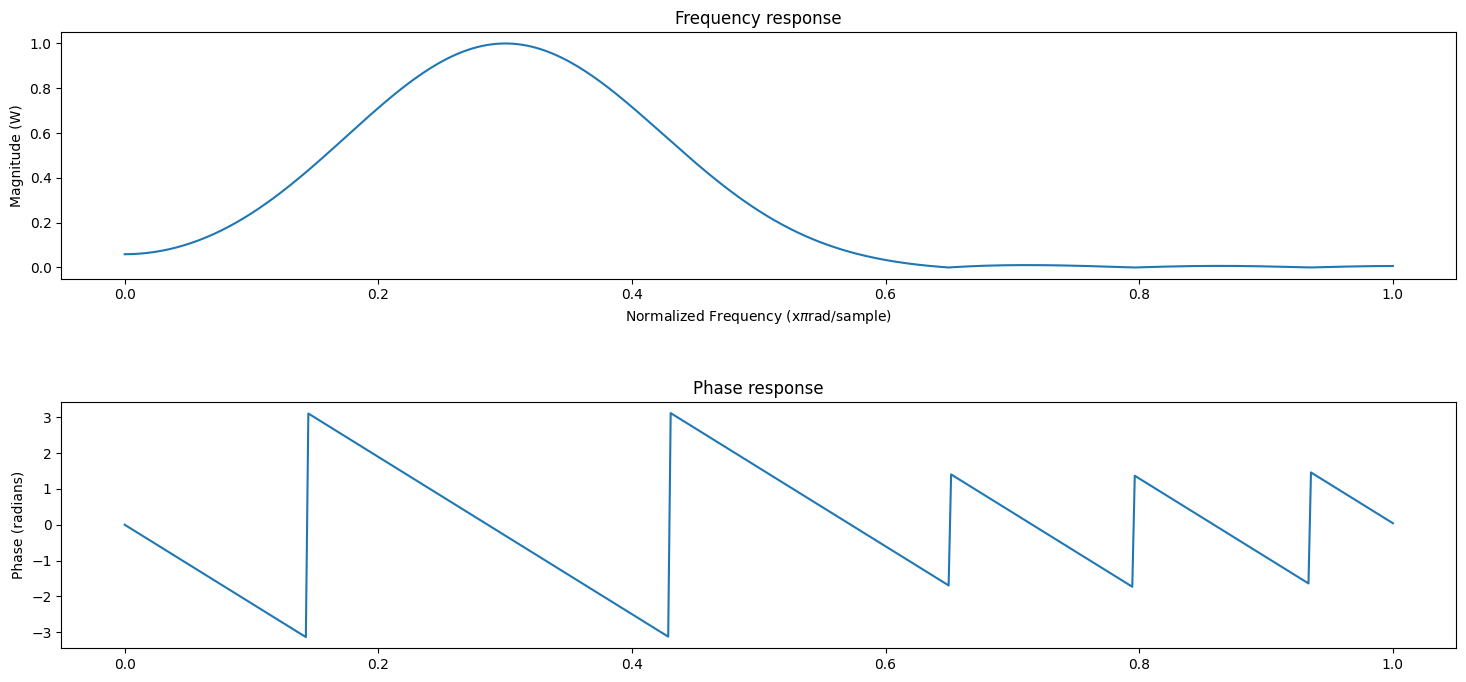

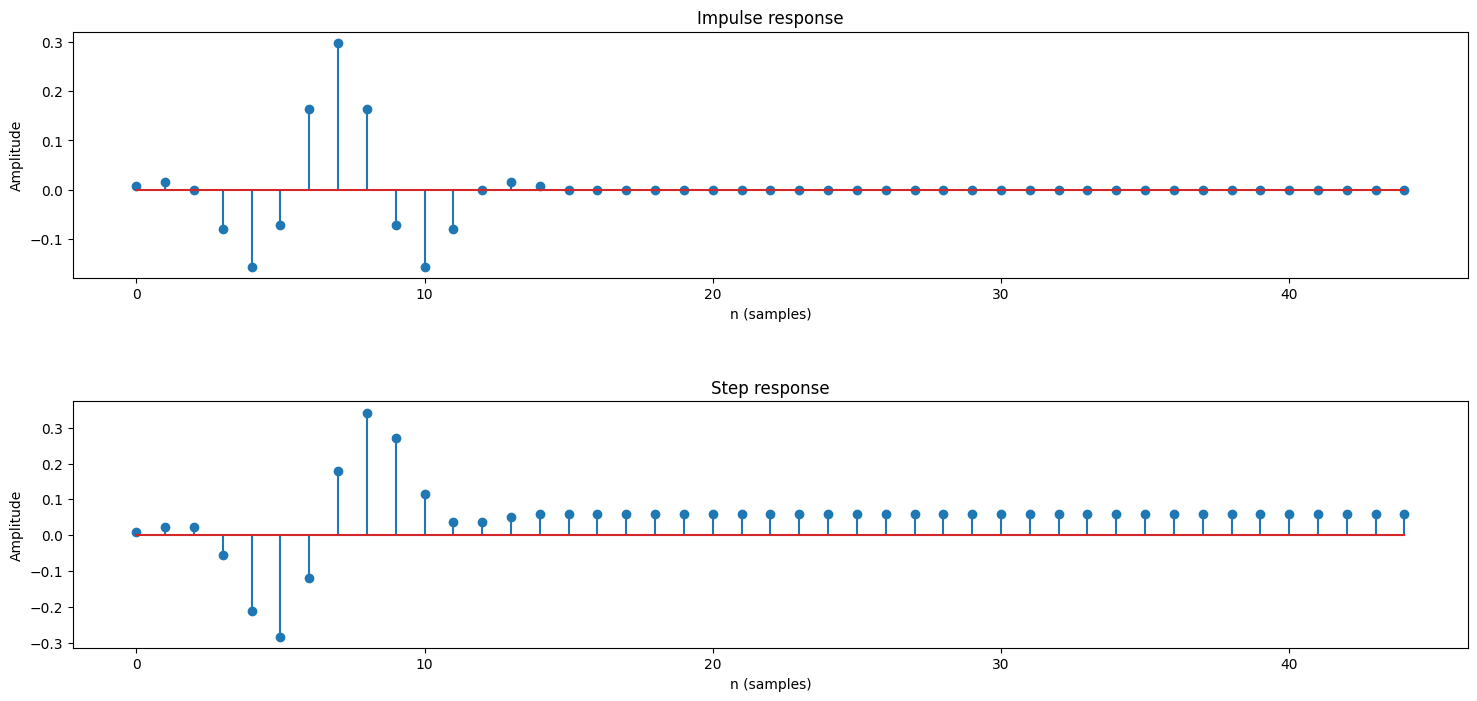

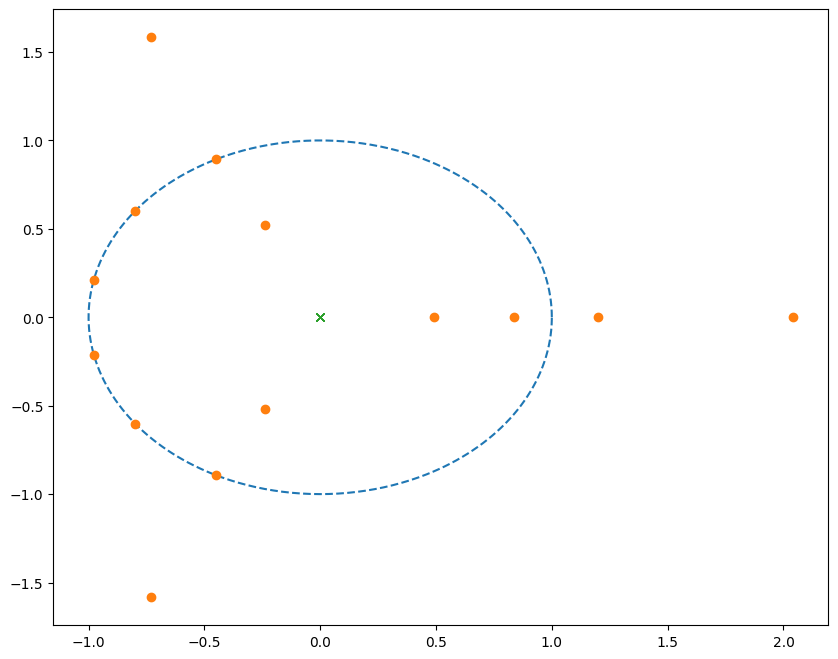

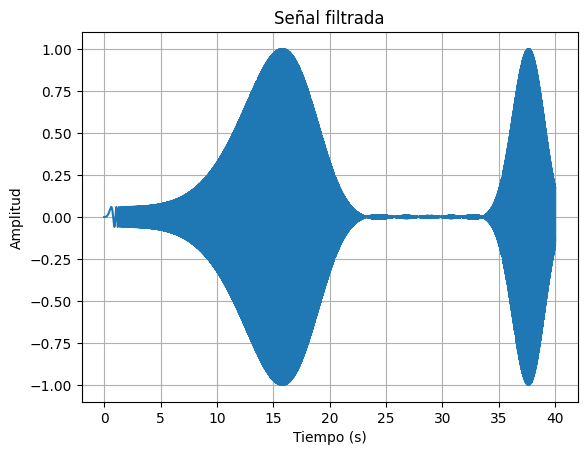

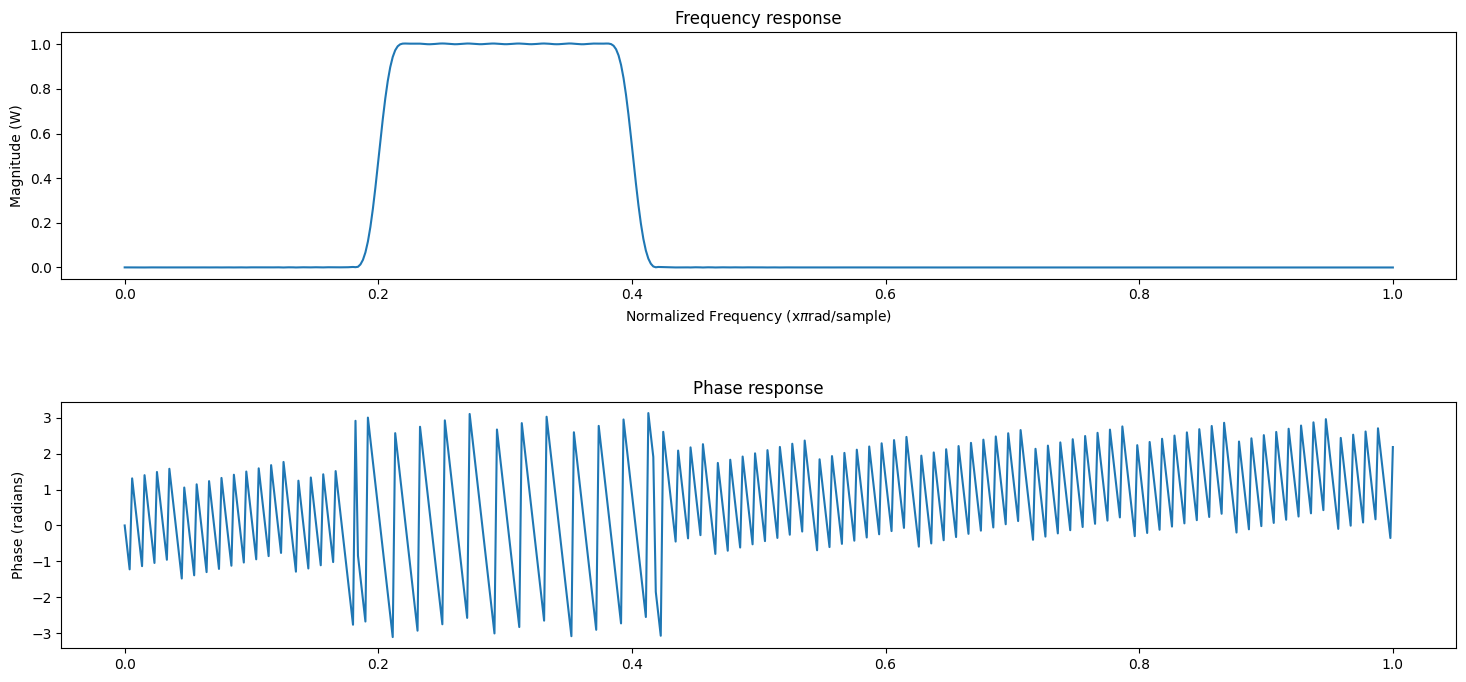

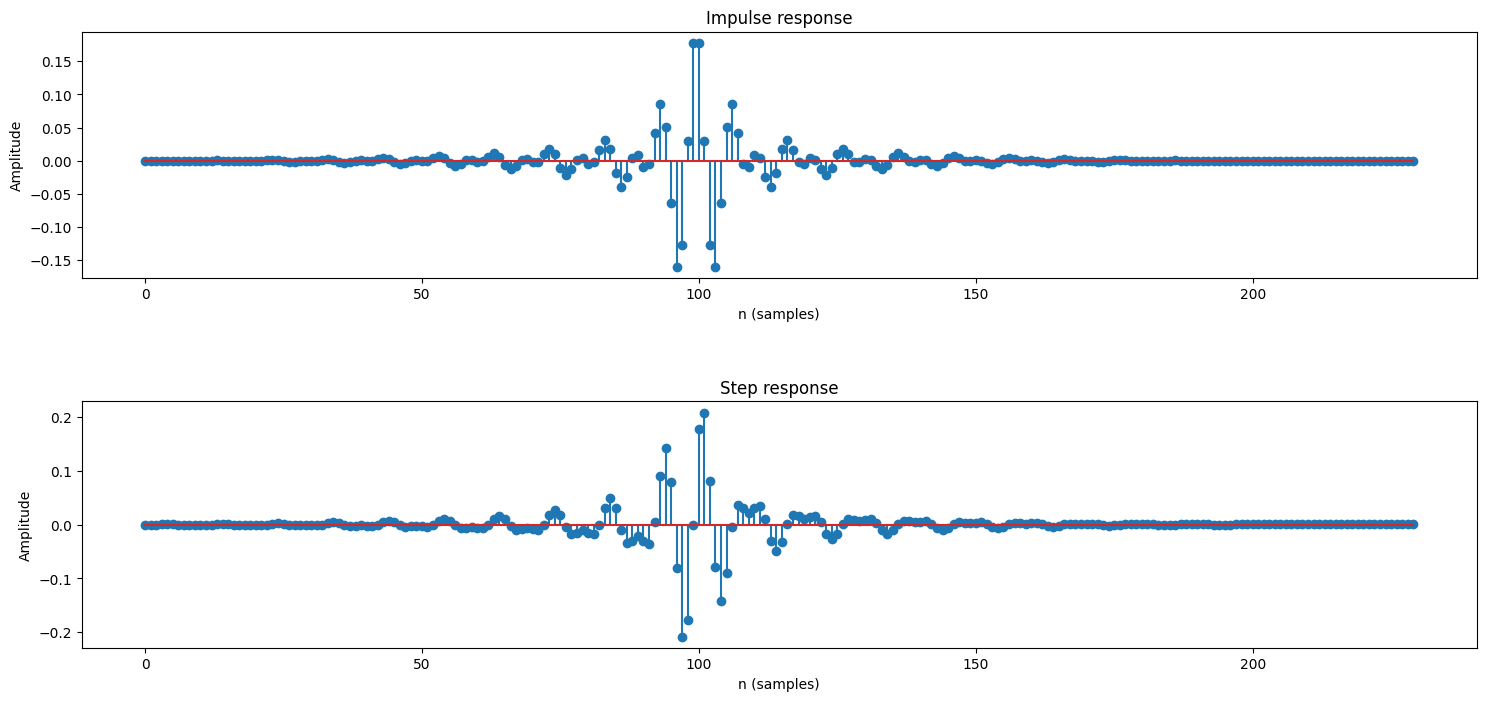

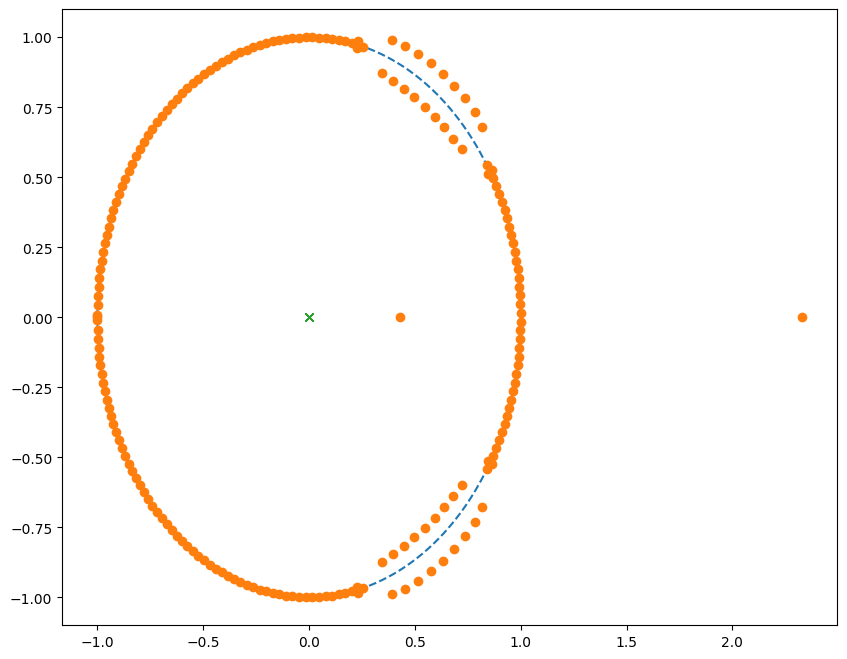

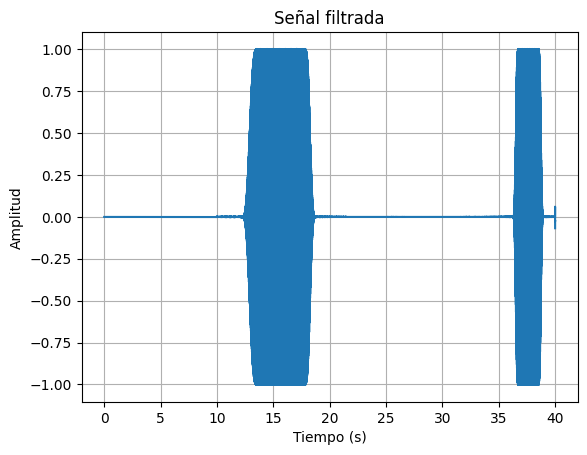

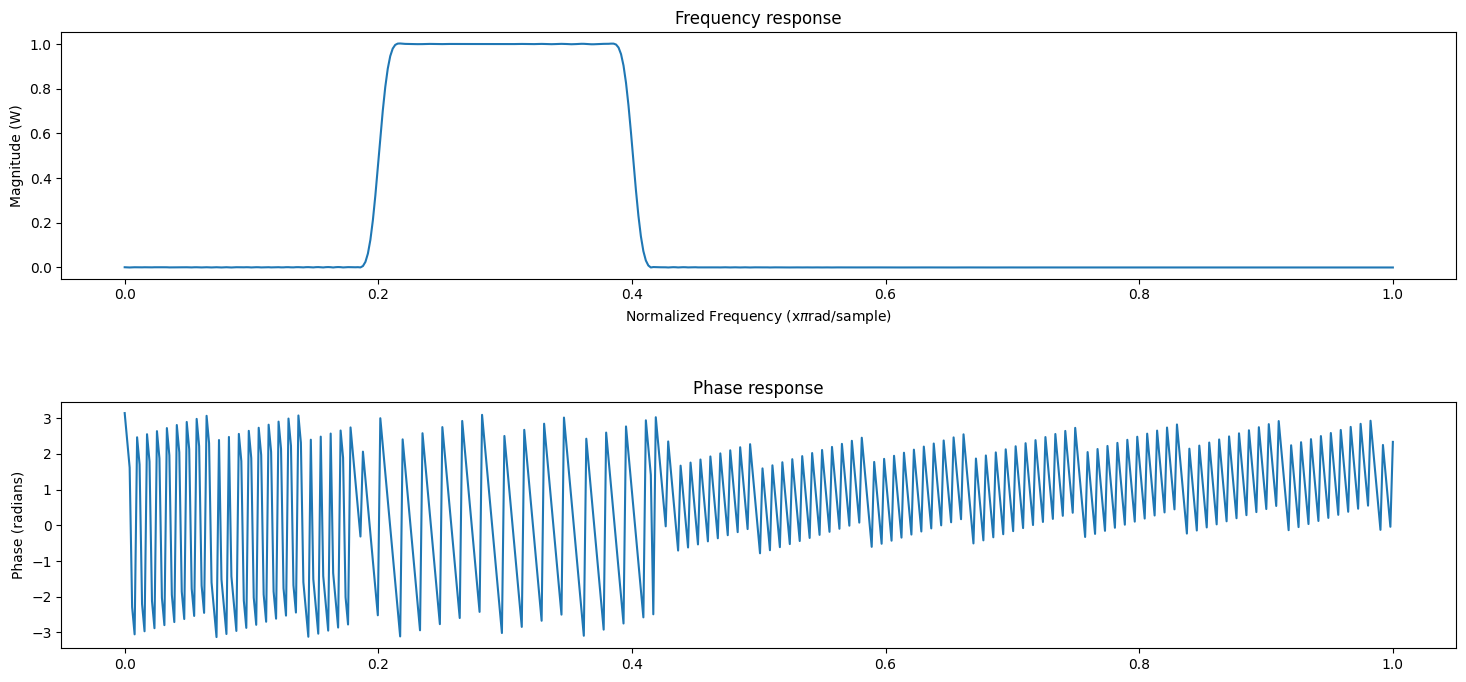

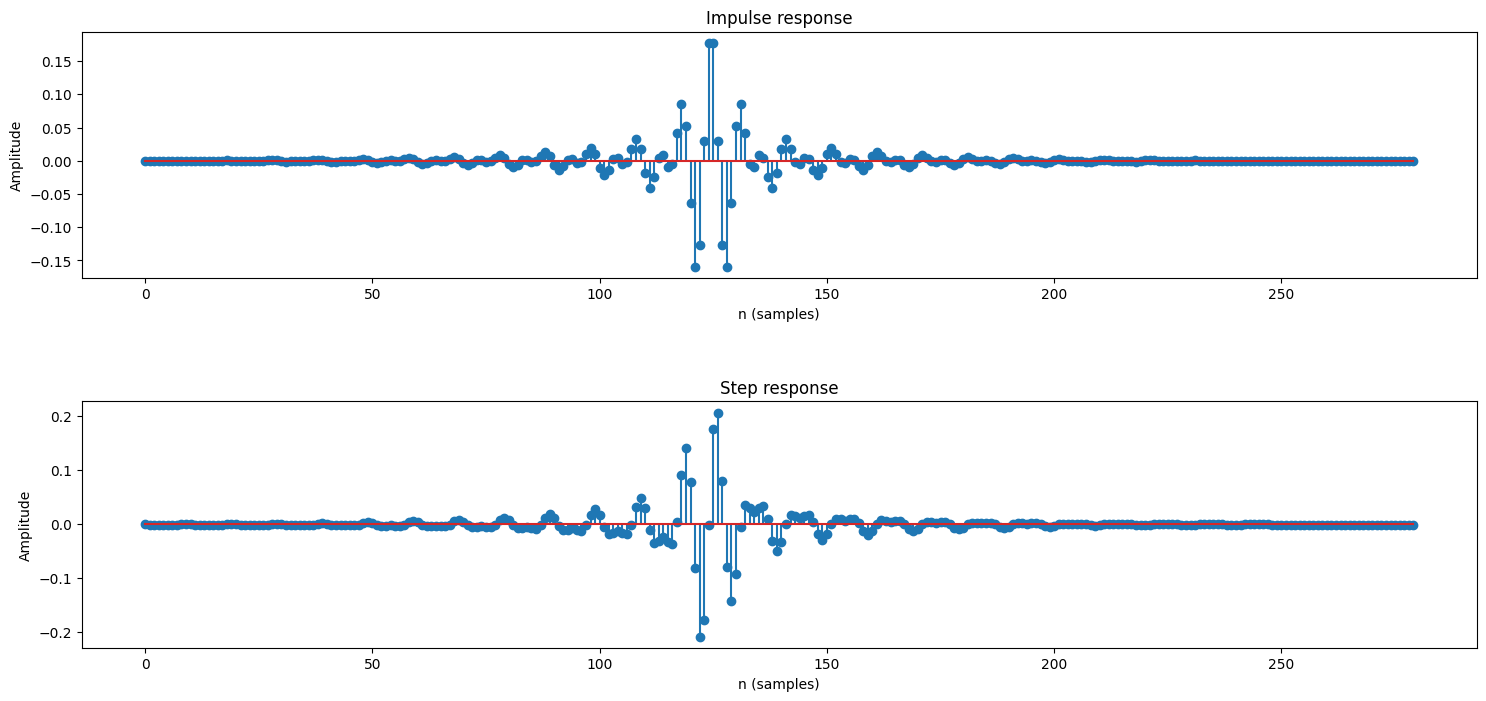

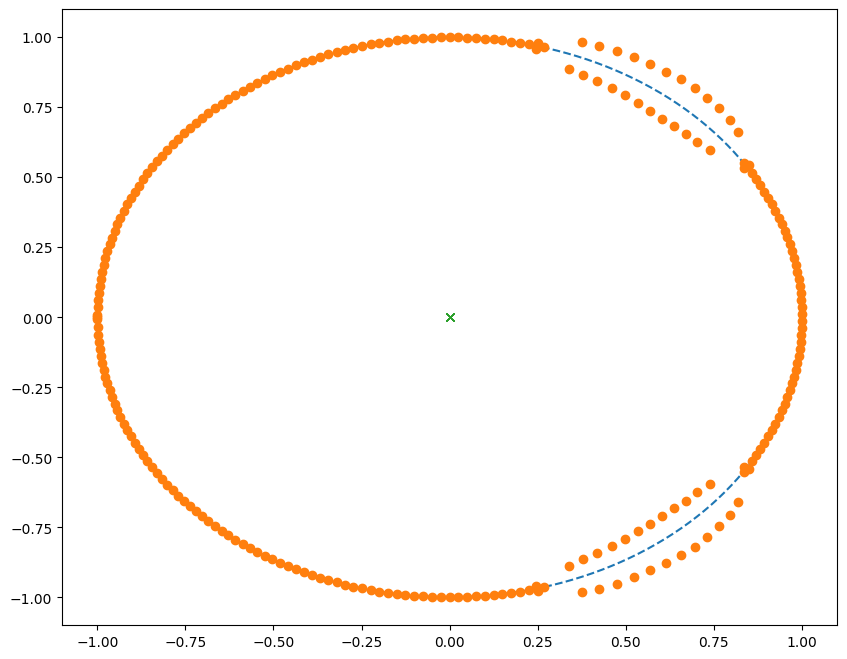

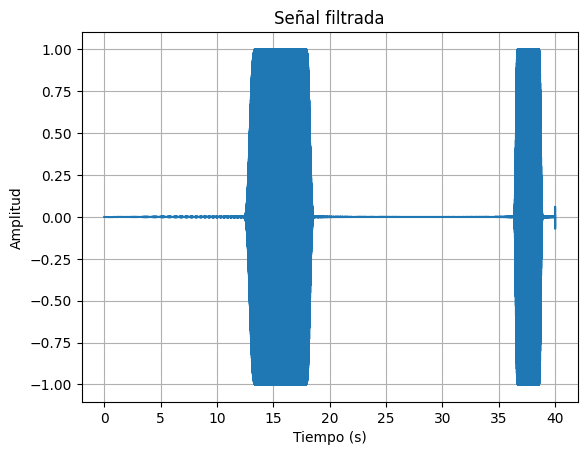

In [ ]:
for i in [15,200,250]:
    n = i
    num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
    den=np.zeros(n)
    den[0] = 1
    mfreqz(num,den)
    impz(num,den)
    zeropoles(num,den)

    # tambien filtro la señal
    data2 = np.convolve(signal_quad, num, mode='same')
    plt.plot(t, data2)
    plt.title("Señal filtrada")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.show()
    


Al aumentar el orden del filtro solo se obtiene que la respuesta en frecuencia sea mas rápida haciendo que el filtro rechace rápidamente las señales que sean inferiores a la frecuencia de corte baja y a las frecuencias que sean superiores a la frecuencia de corte alta.



8. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cúbica, la señal debe tener
la misma duración (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya de acuerdo a las gráficas obtenidas.

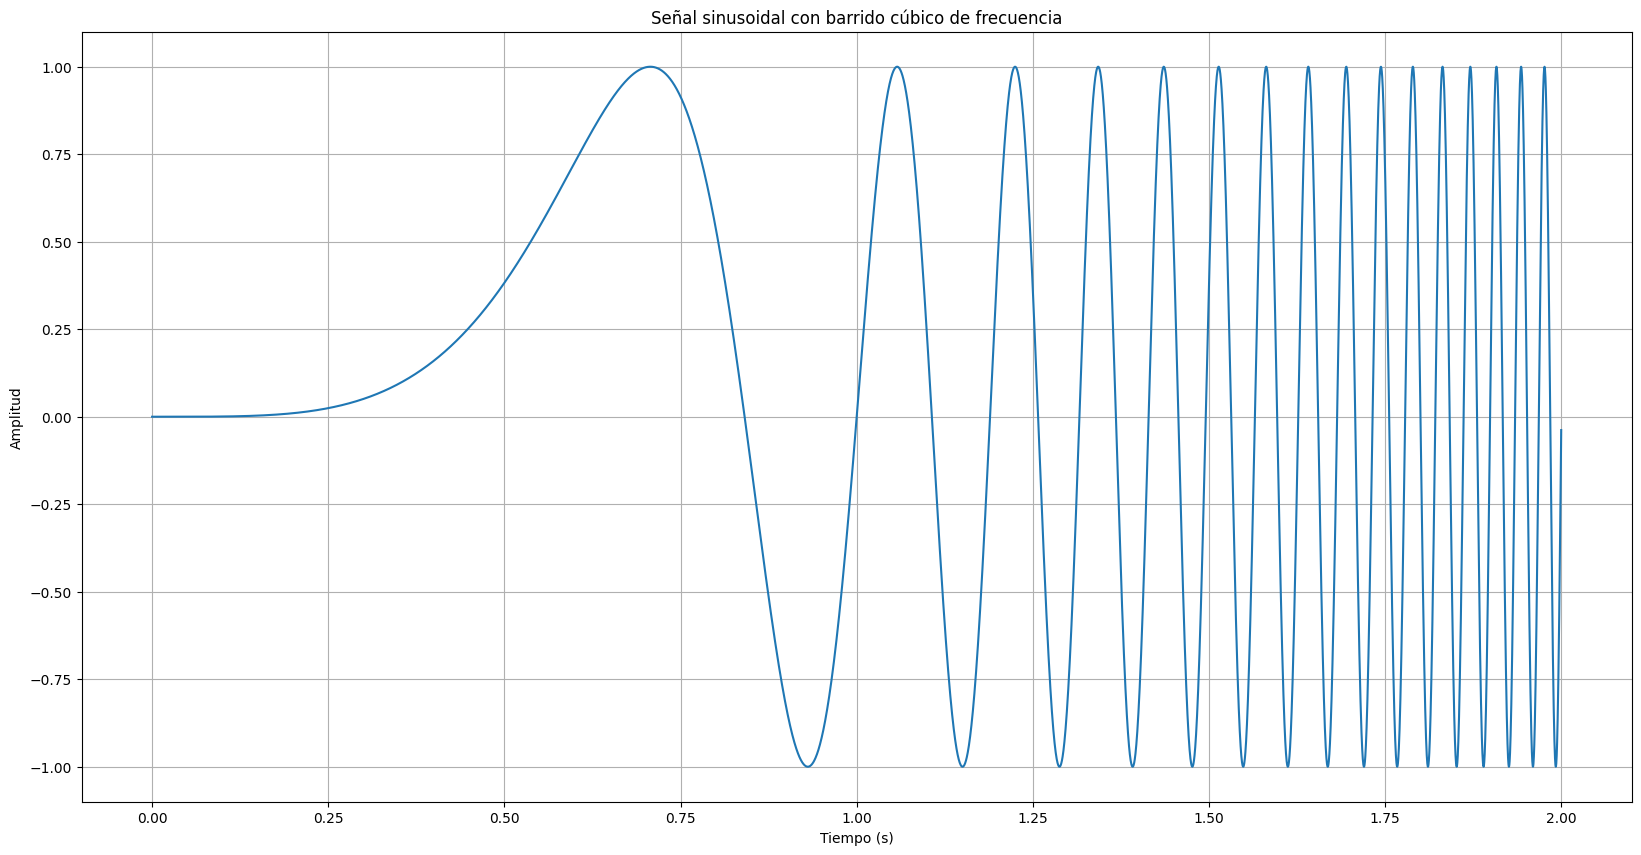

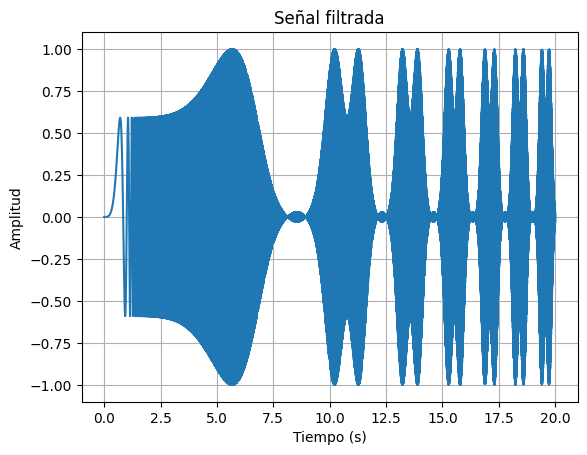

In [ ]:
duracion = 40  # Duración en segundos
frec_muestreo = 5000  # Frecuencia de muestreo en Hz

# Crear de tiempo
t = np.linspace(0, duracion, duracion * frec_muestreo)
f_t = t**3      # frecuencia de barrido cúbico
signal_cub = np.sin(2 * np.pi * f_t * t)

n = 9
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

plt.figure(figsize=(20, 10))
plt.plot(t[0:10000], signal_cub[0:10000])
plt.title("Señal sinusoidal con barrido cúbico de frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Filtrar la señal
data2 = np.convolve(signal_cub, num, mode='same')
plt.plot(t[0:100000], data2[0:100000])
plt.title("Señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


#mostrar el audio
Audio(signal_cub, rate=frec_muestreo)

De manera analógica a lo ocurrido con la señal cuadratica, como ahora la frecuencia es una fución cubica el limite de Nyquist se alcanza mucho antes que en la señal cuadratica, de esta manera en un audio de 40 s se pueden obtener cilos de filtrado o un comportamiento ciclico. 

## 8. Agregando polos y ceros al sistema

1. Retorne al sistema anterior con n = 10.

2. Use la función computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para
agregar polos y ceros a una función de transferencia. Observe un ejemplo a continuación:

```python
    n = 10
    num = signal.firwin(n, [0.1, 0.4], pass zero=False)
    den=np.zeros(n)
    den[0]=1
    # Agregue polos conjugados en los puntos z1=-sqrt(2)/4+sqrt(2)/2j y z2=-sqrt(2)/4-sqrt(2)/2j y...un cero en z=0.5
    computeZ(num, den, [0.5], [complex(-np.sqrt(2)/4,np.sqrt(2)/2), ...
    complex(-np.sqrt(2)/4,-np.sqrt(2)/2)], data)
```

<Figure size 640x480 with 0 Axes>

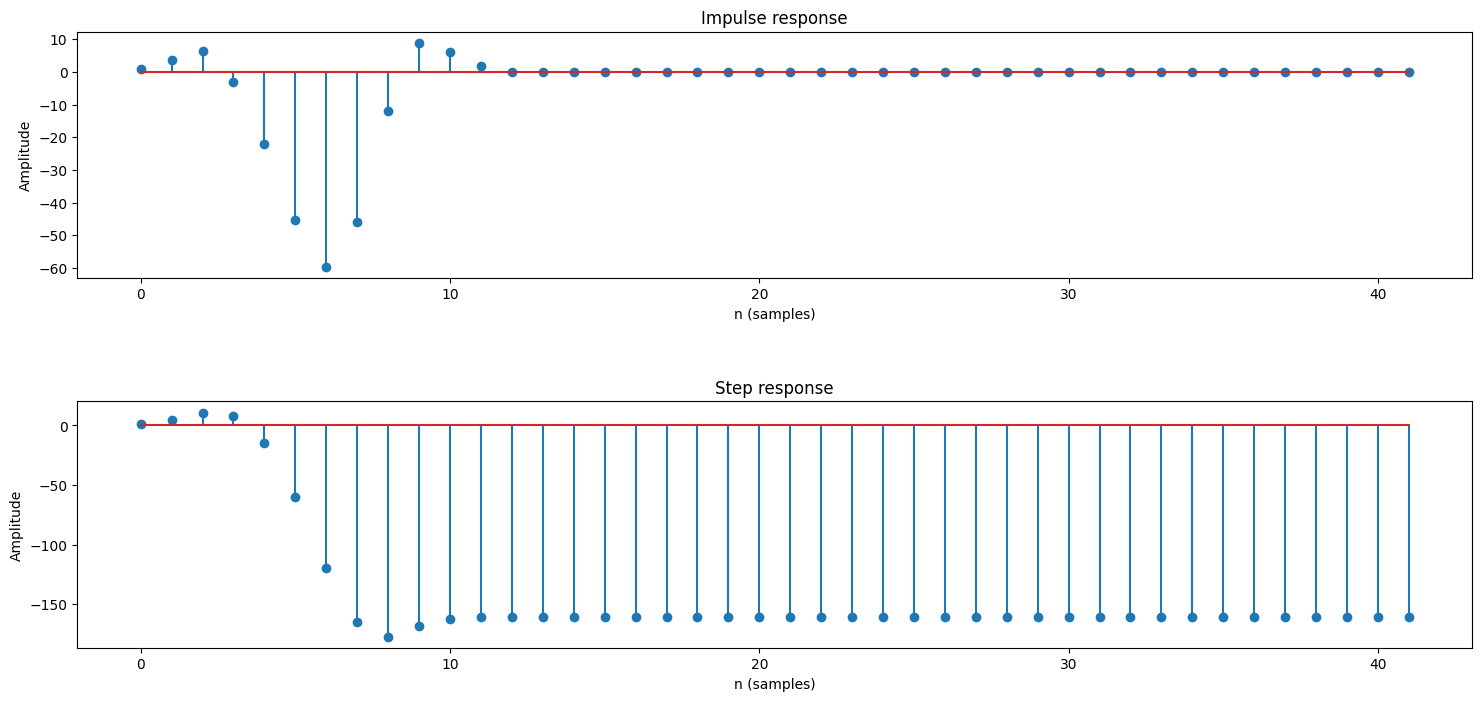

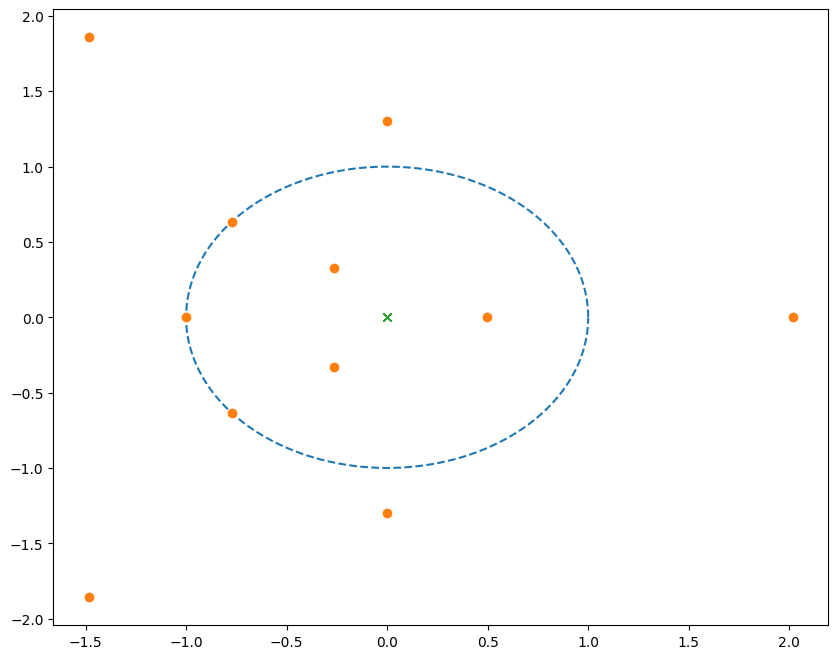

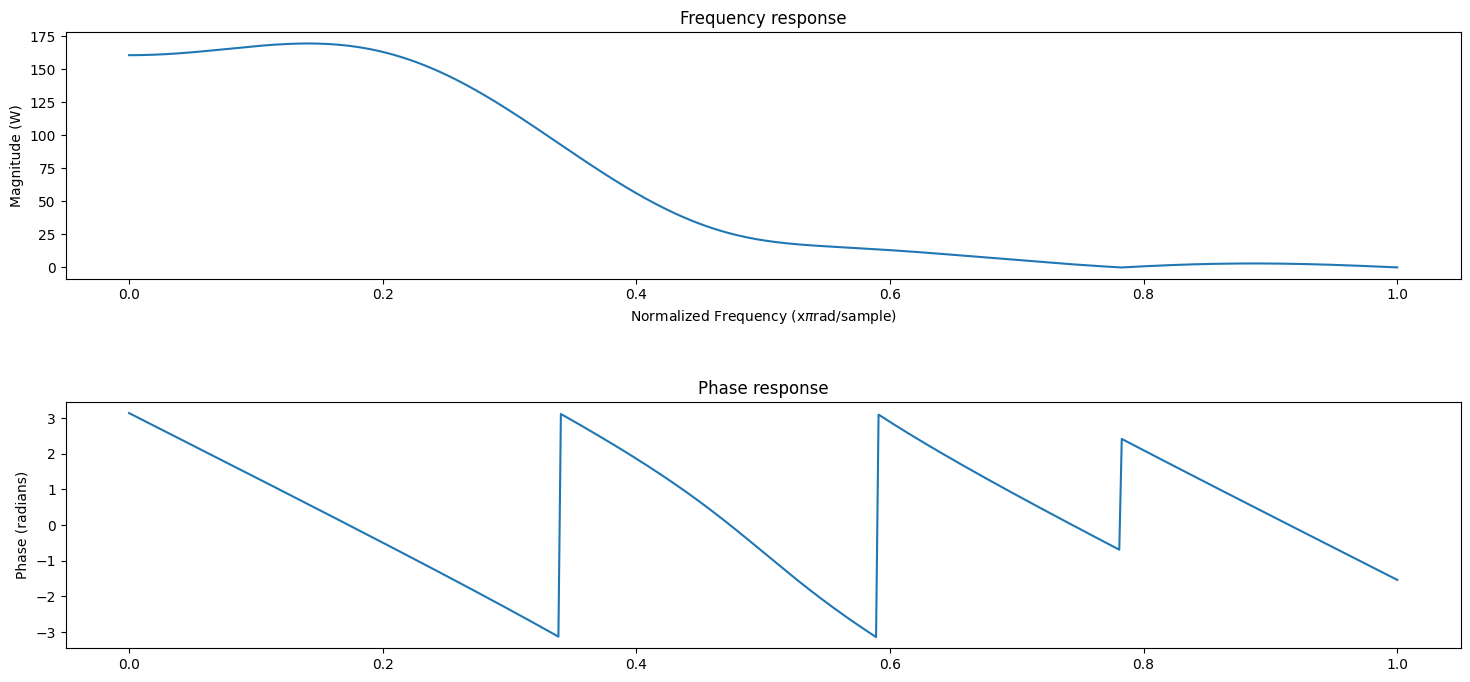

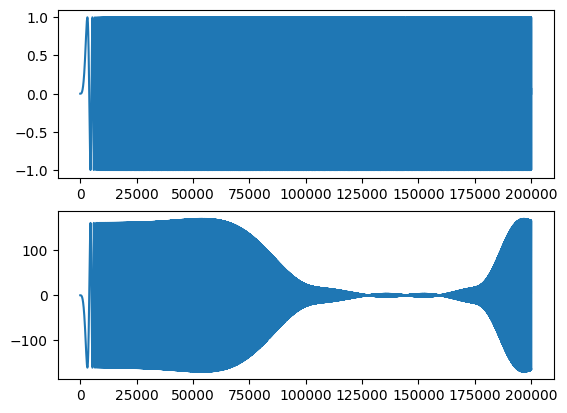

In [ ]:
# Crear tiempo
t = np.linspace(0, duración, duración * frec_muestreo)
f_t = t**2
x = np.sin(2 * np.pi * f_t * t)

n = 10
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1


n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0]=1
computeZ(num, den, [complex(0,1.3), complex(0,-1.3)], 0, x)

El sistema sigue presentando un comportamiento estable debido a que solo se agregan ceros, los cuales no afectan la estabilidad del sistema, a diferencia de los ceros que si afectan la estabilidad.



<Figure size 640x480 with 0 Axes>

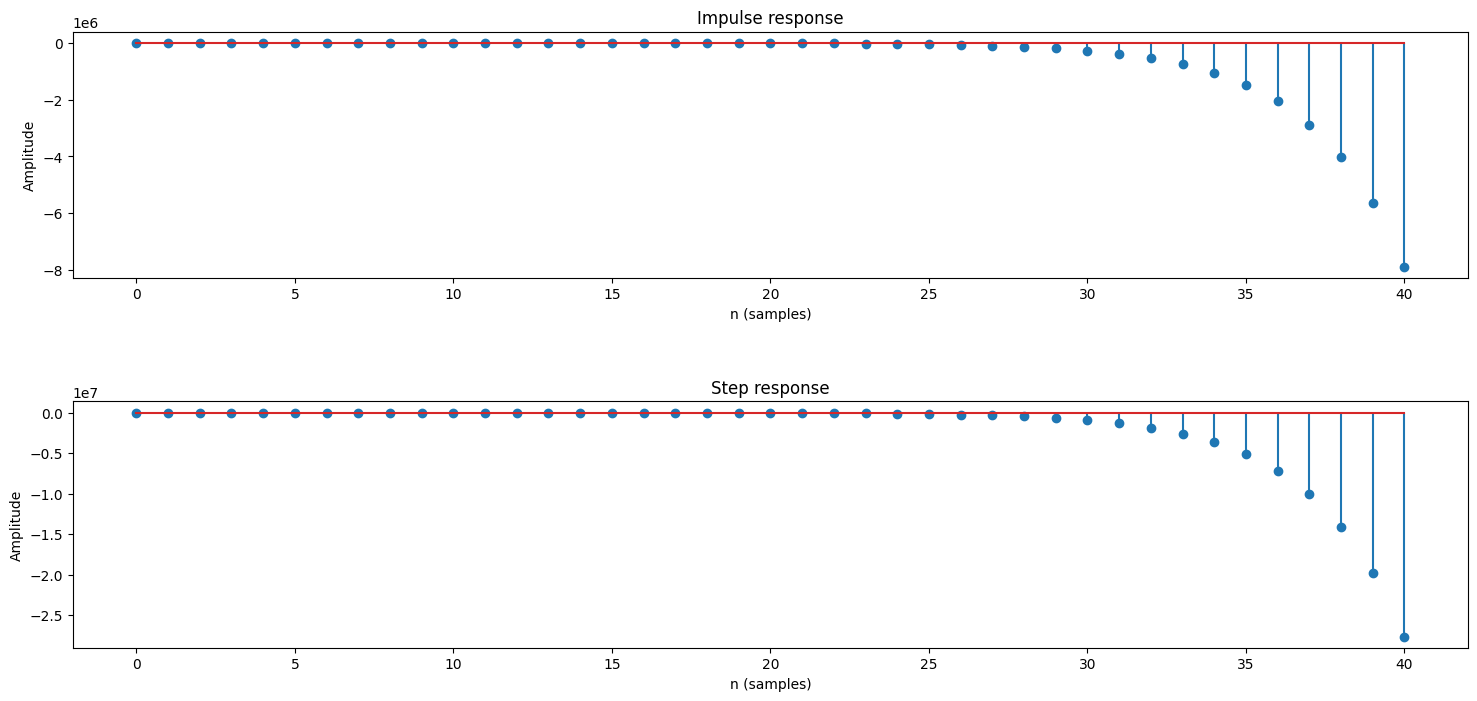

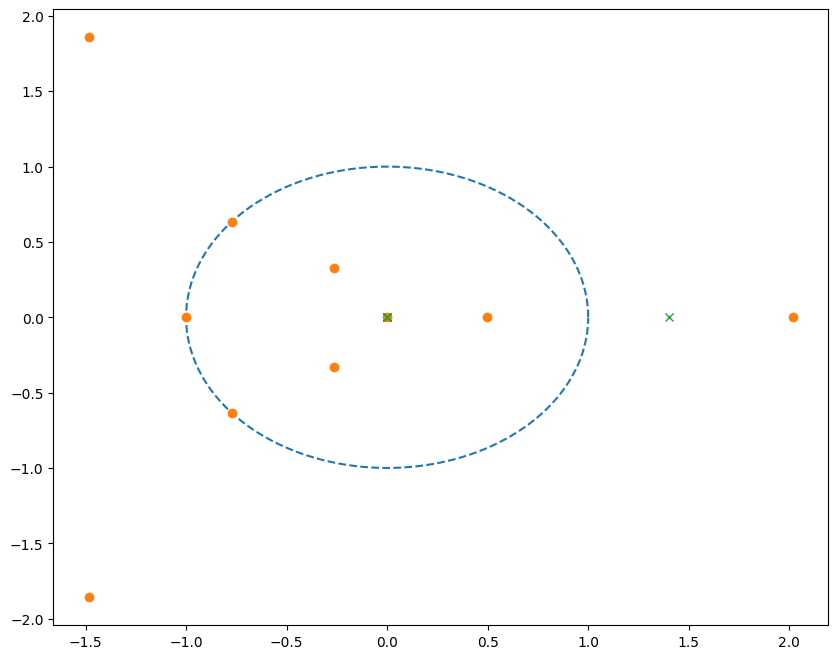

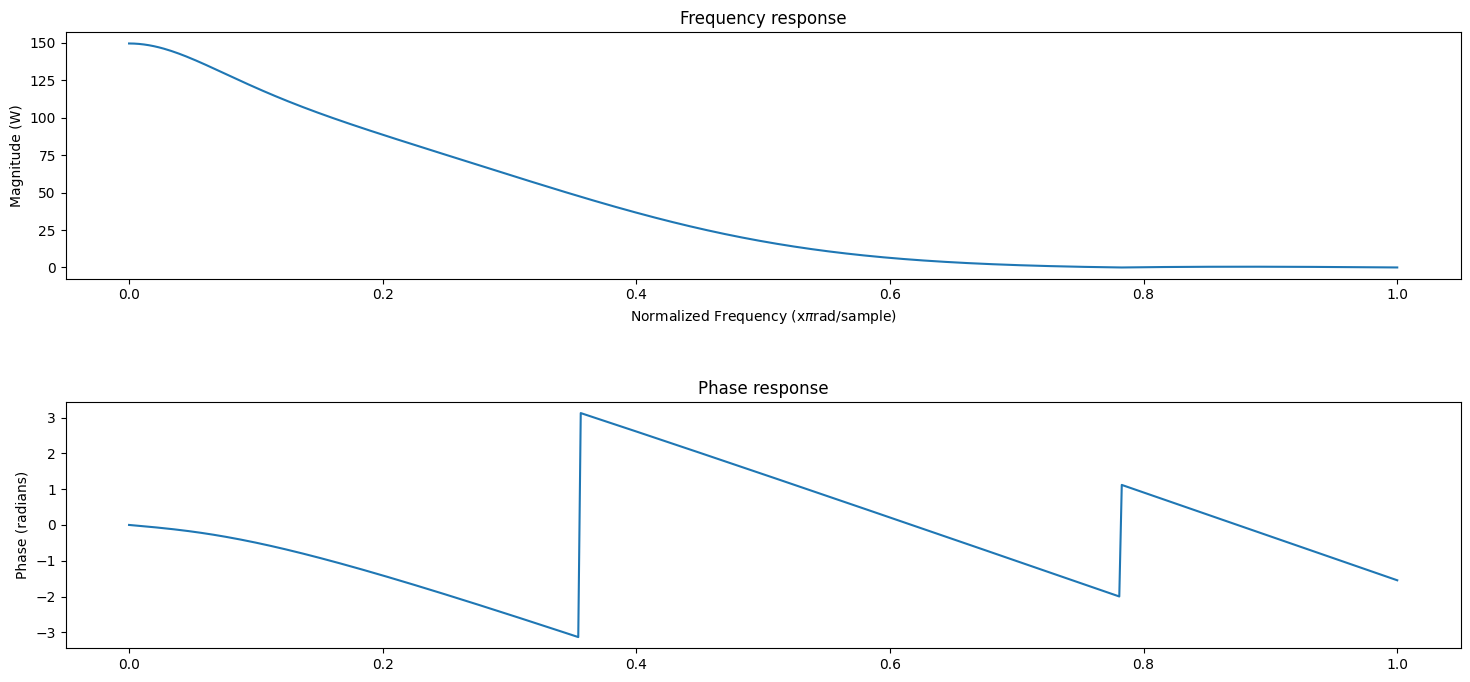

ValueError: arange: cannot compute length

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 0 Axes>

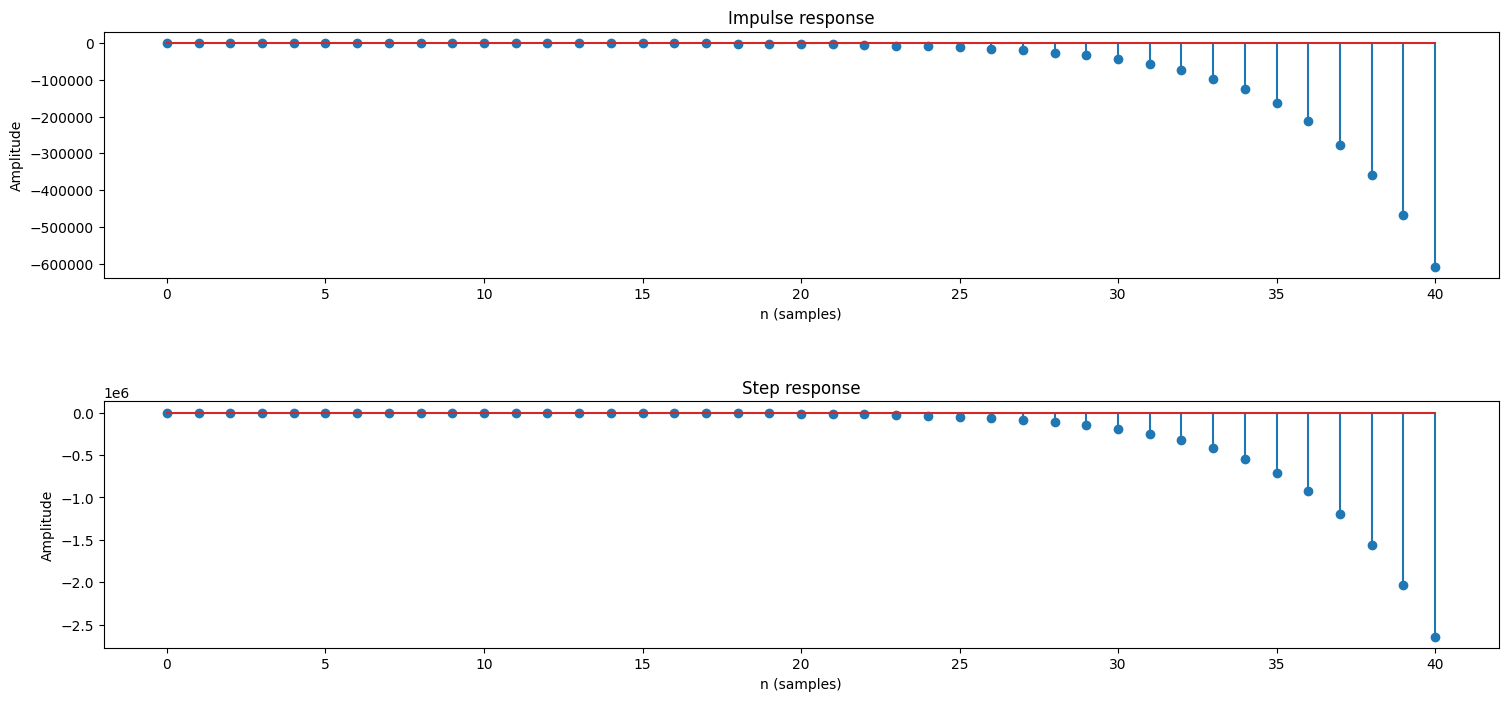

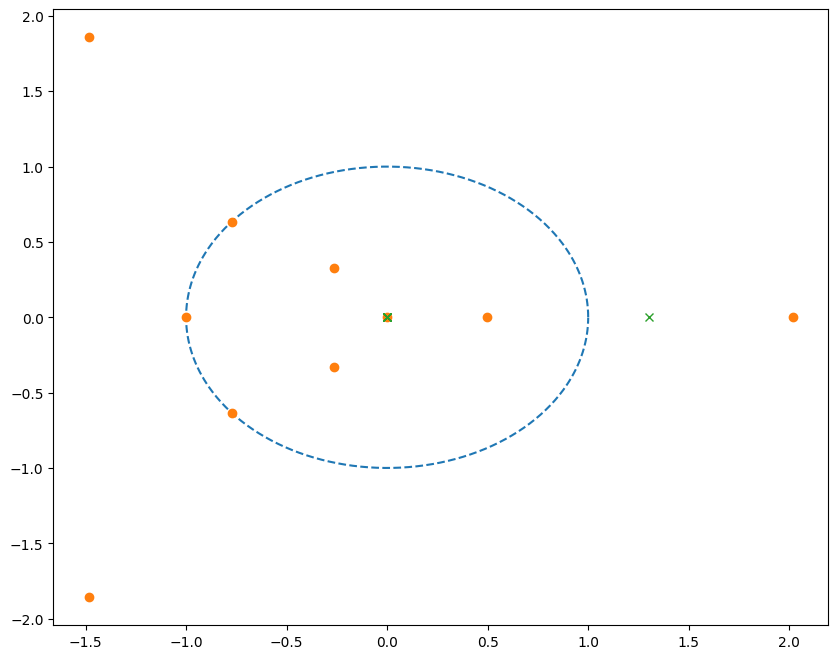

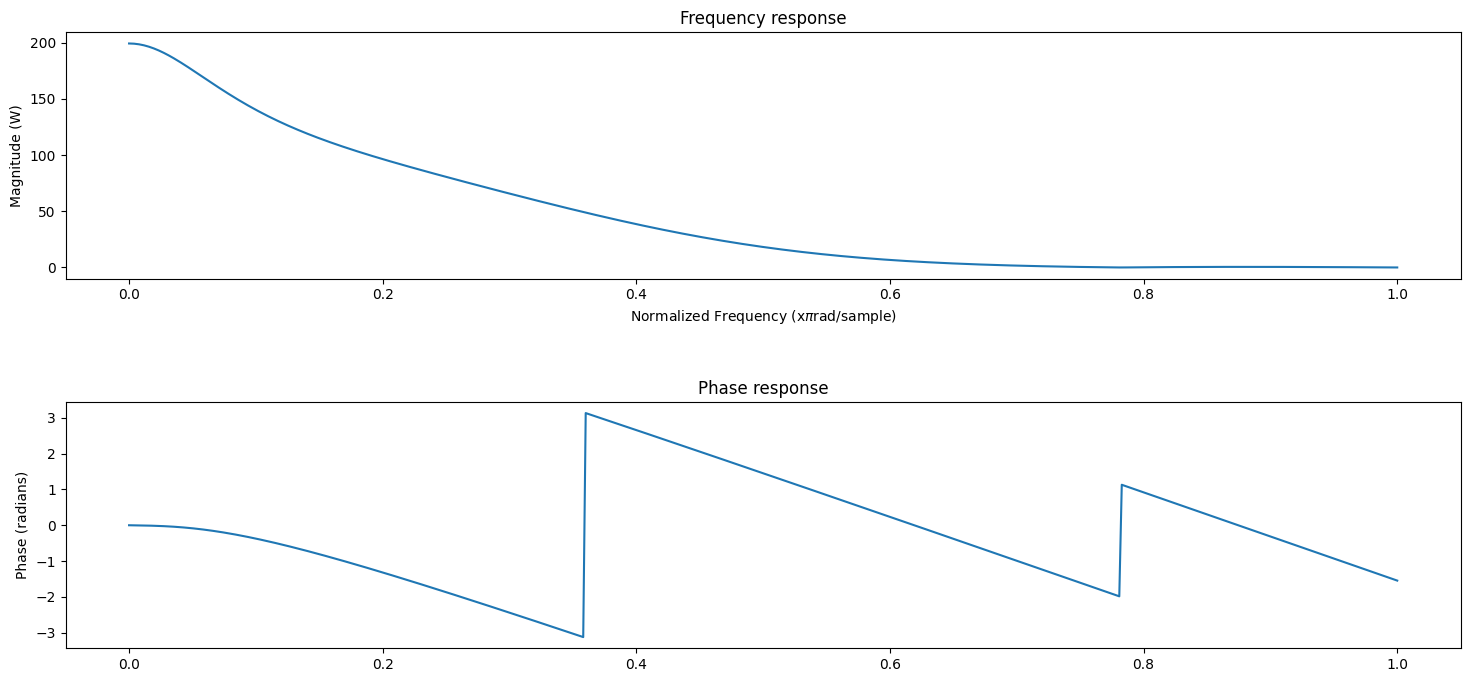

ValueError: arange: cannot compute length

<Figure size 640x480 with 2 Axes>

In [ ]:
computeZ(num, den, 0, 1.4, x)
computeZ(num, den, 0, 1.3, x)

Al agregar un polo en 1.4 se agrega un polo por fuera del circulo unitario y el sistema se inestabiliza. comportamiento que es notablemente visible en las graficas de respuesta al escalon y al impulso, donde la respuesta crece repentina y de forma incontrolada. 


# Conclusiones

* Los filtros digitales, al igual que los filtros analógicos, permiten seleccionar o atenuar componentes de una señal según su contenido en frecuencia. Dependiendo del tipo de filtro y su orden, se pueden lograr respuestas más precisas y eficientes. En particular, al aumentar el orden del filtro, se mejora la selectividad y el rendimiento del mismo, lo que permite una mejor separación entre bandas de paso y de rechazo.

* La estabilidad de un sistema es un aspecto crítico en su diseño. Para garantizar un comportamiento confiable y predecible, especialmente en sistemas de procesamiento digital, es esencial que los polos del sistema estén dentro del círculo unitario en el plano Z. Conocer y analizar la ubicación de polos y ceros se vuelve entonces indispensable para asegurar que el filtro no solo cumpla su función, sino que lo haga de manera estable y controlada.